In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt


In [2]:
main_df = pd.read_csv("youtuber_final.csv", encoding = 'utf-8-sig')

In [114]:
main_df.columns

Index(['Unnamed: 0', 'youtuber', 'subscriberCount', 'videoCount', 'likeCount',
       'dislikeCount', 'viewCount', 'commentCount', 'recentFrequency',
       'idcount', 'cmt_with_lim', 'cluster'],
      dtype='object')

In [96]:
def plot_compare(x_axis, y_axis,x_name,y_name, index='None'):
    #main_df = pd.read_csv("youtuber_final.csv", encoding = 'utf-8-sig')
    if index != 'None':
        plt.scatter(x_axis, y_axis, alpha=0.5)
        color = ['b'] * len(x_axis)
        color[index] = 'r'
        plt.scatter(x_axis, y_axis, color = color, alpha=0.5)
    else:
        plt.scatter(x_axis, y_axis, alpha=0.5)
        
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.show()
    
def find_index(input_df, artist):
    return list(input_df['youtuber']).index(artist)
    

#def plot_compare(how):
#    print("input: two column names. output: scatter plot comparing effect of two elements")

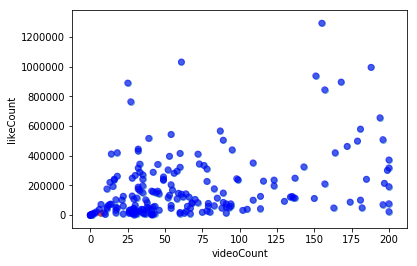

In [113]:
plot_compare(main_df['videoCount'], main_df['likeCount'], 'videoCount', 'likeCount', find_index(main_df, 'April_ASMR'))
#plot_compare(df['x_axis'], df['y_axis'], 'x_axis name', 'y_axis name', (optional - find_index(df used, youtuber_name)))

In [100]:
df_per_video = main_df[['youtuber','subscriberCount', 'videoCount', 'likeCount', 'dislikeCount', 'viewCount', 'commentCount', 'recentFrequency']].copy()
#new = old[['A', 'C', 'D']].copy()

df_per_video['likeCount'] /= df_per_video['videoCount']


df_per_video['dislikeCount'] /= df_per_video['videoCount']
df_per_video['viewCount'] /= df_per_video['videoCount']
df_per_video['commentCount'] /= df_per_video['videoCount']

df_per_video['idconcentration'] = main_df['idcount'] / main_df['cmt_with_lim']

df_per_video.rename(columns={"likeCount": "avgLike", "dislikeCount": "avgDislike", "viewCount":"avgView", "commentCount" : "avgComment"}, inplace=True)

df_per_video.head() # 유튜버마다 영상 수가 달라서 값이 천차만별이라 영상당 평균으로 변환한 df 하나 더 생성함

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
0,72초TV,202135,38,1435.236842,5.868421,34353.184211,124.552632,1.0,0.622458
1,9bul,396293,35,5665.742857,171.371429,459170.085714,1391.571429,1.5,0.754690
2,AUTOSONICS오토소닉스,72889,83,767.469880,37.891566,62786.759036,220.783133,4.0,0.337224
3,April_ASMR,433502,7,1749.285714,85.714286,58121.571429,308.571429,0.0,0.799423
4,Babzi_ASMR,246983,1,2973.000000,15.000000,57503.000000,530.000000,0.0,NaN


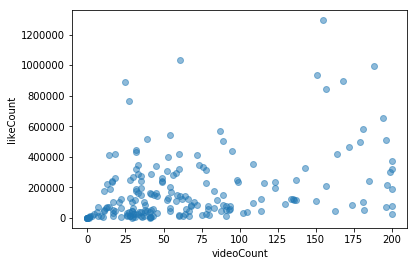

In [24]:
plot_compare(main_df['videoCount'], main_df['likeCount'], 'videoCount', 'likeCount') #원래 df로 영상 수와 좋아요 수 비교

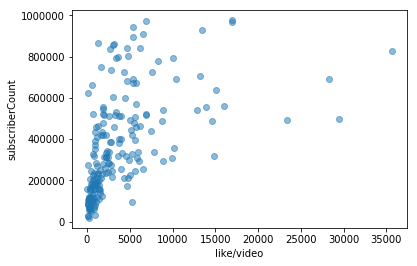

In [29]:
plot_compare(main_df['likeCount']/main_df['videoCount'], main_df['subscriberCount'], 'like/video', 'subscriberCount') #연산도 가능

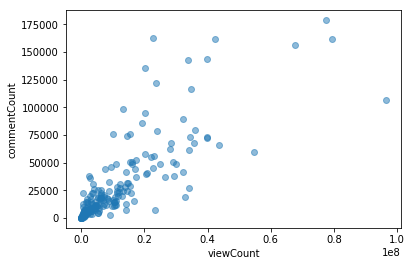

In [31]:
plot_compare(main_df['viewCount'], main_df['commentCount'], 'viewCount', 'commentCount') #어느정도 linear한 값 발견해보기
                                                                                         #잘 참조하면 이런걸 기준으로 차원축소 가능

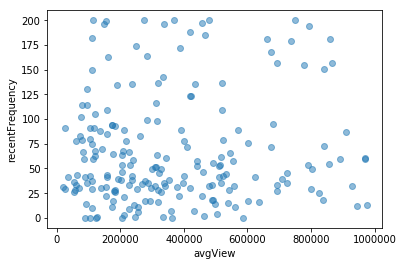

In [150]:
plot_compare(df_per_video['subscriberCount'], df_per_video['videoCount'], 'avgView', 'recentFrequency') #calculation with new df divided per video

In [101]:
df_per_video.head(20)

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
0,72초TV,202135,38,1435.236842,5.868421,34353.184211,124.552632,1.00,0.622458
1,9bul,396293,35,5665.742857,171.371429,459170.085714,1391.571429,1.50,0.754690
2,AUTOSONICS오토소닉스,72889,83,767.469880,37.891566,62786.759036,220.783133,4.00,0.337224
3,April_ASMR,433502,7,1749.285714,85.714286,58121.571429,308.571429,0.00,0.799423
4,Babzi_ASMR,246983,1,2973.000000,15.000000,57503.000000,530.000000,0.00,NaN
5,BellaLucas벨라앤루카스,338333,35,7784.171429,39.171429,164511.828571,335.714286,1.50,0.806835
6,BoriBori_보리보리,207080,54,839.074074,202.703704,127875.111111,199.611111,1.33,0.603059
7,Chuther츄더문에스더,491694,18,23397.444444,342.722222,398467.555556,1168.944444,1.00,0.918746
8,ClassyTV_클래씨티비,204617,46,713.195652,19.000000,37558.869565,139.000000,2.17,0.650648
9,Cuckoo_Crew,836213,18,2673.000000,73.666667,199975.500000,432.888889,1.33,0.835227


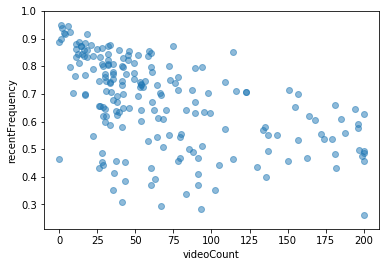

In [132]:
plot_compare(df_per_video['videoCount'], df_per_video['idconcentration'], 'videoCount', 'recentFrequency')

In [110]:
df_per_video.sort_values('recentFrequency', ascending= False) #한 칼럼을 중심으로 정렬해서 볼수도 있음

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
89,꽃자,457233,197,1085.903553,46.203046,8.746764e+04,189.908629,23.17,0.496575
159,의학채널_비온뒤,275156,200,117.795000,5.325000,3.386820e+03,13.490000,22.00,0.458333
120,배나무배나TV,113514,200,383.465000,12.710000,1.341919e+04,39.515000,13.67,0.261561
163,이스타TV,154590,199,1511.527638,46.412060,1.017642e+05,475.633166,9.17,0.475331
81,거제폭격기_김영환,147479,196,360.132653,30.188776,6.818195e+04,122.005102,8.67,0.591548
111,미남의운전교실,161316,163,297.141104,16.368098,2.643506e+04,41.368098,8.33,0.467547
109,맛상무,479749,200,1860.015000,143.660000,1.989323e+05,717.240000,8.17,0.628970
99,디렉터_짱구대디,370525,200,960.630000,22.305000,8.690714e+04,261.870000,8.17,0.493032
25,JM,338308,196,2596.821429,197.306122,1.154269e+05,831.734694,7.33,0.575389
104,러너_꽃빈TV,750357,200,1591.840000,22.890000,1.022407e+05,198.700000,6.83,0.487884


In [112]:
df_per_video.sort_values('idconcentration', ascending = False)

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
140,씬스틸러,126789,1,1776.000000,51.000000,1.460640e+05,233.000000,0.00,0.949495
39,Minos,255836,6,6524.333333,220.666667,1.041622e+05,1579.166667,0.83,0.946970
117,밤비걸Bambigirl,464681,2,6159.000000,121.500000,1.213215e+05,788.500000,0.33,0.939394
53,SisterSOON,358235,7,10119.714286,310.571429,2.736044e+05,1001.428571,0.33,0.923521
139,씨즐_Sizzle,210886,3,4304.000000,51.000000,1.649310e+05,1443.333333,0.00,0.919192
7,Chuther츄더문에스더,491694,18,23397.444444,342.722222,3.984676e+05,1168.944444,1.00,0.918746
155,유소나,504818,4,5648.000000,500.000000,2.366078e+05,1466.750000,0.67,0.916667
141,악어의사생활,333901,1,4090.000000,66.000000,1.983270e+05,1181.000000,0.00,0.898990
132,셀프어쿠스틱selfacoustic,975503,13,16927.846154,630.769231,1.094837e+06,574.307692,0.50,0.889666
123,브베_스트리밍,88494,0,NaN,NaN,NaN,NaN,0.00,0.887665


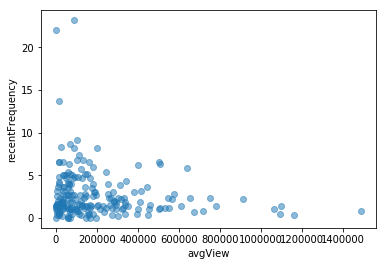

In [153]:
plot_compare(df_per_video['avgView'], df_per_video['recentFrequency'], 'avgView', 'recentFrequency') #calculation with new df divided per video

In [224]:
tmpdf = df_per_video.sort_values('avgView', ascending=False)

In [225]:
tmpdf.sort_values('videoCount') #2019년 영상이 없는 리스트 = 173, 118, 80, 52, 31, 123
                                #2019년 영상이 10개 미만인 리스트 = 141, 4, 140, 117, 139, 155, 39, 3, 53, 83
                                #총 16명 뺌

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
173,젤리플__쥐픽_Jellyple,105342,0,nan,nan,nan,nan,0,nan
118,밤하느리ASMR,206638,0,nan,nan,nan,nan,0,nan
80,거의_한국인__Almost_Koreans,124305,0,nan,nan,nan,nan,0,nan
52,Silv3rT3ar,586273,0,nan,nan,nan,nan,0,nan
31,KoonTV_Funny,361832,0,nan,nan,nan,nan,0,0.4653689452
123,브베_스트리밍,88494,0,nan,nan,nan,nan,0,0.8876651982
141,악어의사생활,333901,1,4090,66,198327,1181,0,0.898989899
4,Babzi_ASMR,246983,1,2973,15,57503,530,0,nan
140,씬스틸러,126789,1,1776,51,146064,233,0,0.9494949495
117,밤비걸Bambigirl,464681,2,6159,121.5,121321.5,788.5,0.33,0.9393939394


In [226]:
tmpdf = tmpdf[tmpdf['videoCount']>=10]

In [227]:
tmpdf = tmpdf[tmpdf['recentFrequency']>=0.5] #6,7월에 2주에 영상 1개 미만 올리는 유튜버 제외
                                                # 154, 33, 15, 90, 12, 170, 148, 24, 58 뺌

In [228]:
len(tmpdf)

178

In [229]:
tmpdf.head()

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
184,칩chip,496791,14,29458.07143,952.5,1485216.357,2888.642857,0.83,0.8744588745
176,지무비__G_Movie,692339,33,10418.75758,312.0909091,1095265.758,2416.121212,1.33,0.8781756964
132,셀프어쿠스틱selfacoustic,975503,13,16927.84615,630.7692308,1094836.692,574.3076923,0.5,0.8896658897
133,소진소진,557741,32,13914.03125,622.5625,1063732.812,1911.25,1,0.8444444444
82,고몽,892201,60,5369.55,271.5166667,910297.5667,997.8333333,2.17,0.8476985961


In [230]:
tmpdf2 = tmpdf[ (tmpdf['avgComment'] >= np.percentile(tmpdf['avgComment'],5)) & (tmpdf['avgLike'] >= np.percentile(tmpdf['avgLike'],5)) & (tmpdf['avgView'] >= np.percentile(tmpdf['avgView'],5))]
len(tmpdf2)

# 평균 코멘트 수, 평균 좋아요 수, 평균 조회수 모두 하위 5%에 속하는 유튜버 제외 - 165명 남음


165

In [231]:
df3 = tmpdf2[tmpdf2['recentFrequency']>=1]

In [232]:
len(df3)

149

In [217]:
tmpdf2.sort_values('recentFrequency')

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
166,입금완료,174026,11,4675.454545,30.18181818,113245.1818,639.5454545,0.5,0.8640955005
191,티키틱_TIKITIK,318884,16,14803.625,46.4375,396024.5,1282.5625,0.5,0.836489899
132,셀프어쿠스틱selfacoustic,975503,13,16927.84615,630.7692308,1094836.692,574.3076923,0.5,0.8896658897
60,UNO_ASMR,256932,11,3927.545455,28.45454545,81028,651.0909091,0.5,0.8328741965
35,Michael_Elliott,328852,26,739.8461538,8.653846154,17610.88462,55.5,0.5,0.6569468268
202,효크포크_Krazy_girl,292870,17,6134.235294,129.0588235,337669.2941,553.5882353,0.5,0.8853238265
14,Dragon_Stone,487282,18,14572.72222,157.5555556,163273.6667,798.8333333,0.5,0.8574635241
96,더스쿱The_SCOOP,602135,17,3019.764706,66.82352941,180081.7059,348.3529412,0.5,0.7694592989
190,키미_Kimi,278912,17,1900.882353,24.64705882,70235.64706,140.1764706,0.67,0.6949375411
55,Sophie_Kim_하은,538954,15,12815.86667,467.7333333,157356.3333,2538.333333,0.67,0.8444444444


In [216]:
len(tmpdf2)

165

In [223]:
df3.sort_values('idconcentration')

,youtuber,subscriberCount,videoCount,avgLike,avgDislike,avgView,avgComment,recentFrequency,idconcentration
120,배나무배나TV,113514,200,383.465,12.71,13419.19,39.515,13.67,0.2615612283
49,SOPHIE_BAN,184355,93,531.9139785,9.677419355,17149.90323,75.59139785,6.5,0.2828472876
2,AUTOSONICS오토소닉스,72889,83,767.4698795,37.89156627,62786.75904,220.7831325,4,0.3372240548
97,데라세르나de_la_Serna,96053,35,425.4857143,23.45714286,36057.34286,79.08571429,1.17,0.352003643
67,gonago고나고,75933,102,310.0294118,16.71568627,15657.40196,140.8627451,4.17,0.3529215359
30,Kobe_Jeans_코비진스,65003,43,218.7906977,6.302325581,14607.83721,286.744186,1.17,0.3845946674
94,단희TV,238112,136,859.1764706,32.57352941,35773.5,76.38970588,5,0.3985546039
119,방구석_리뷰룸,105079,91,581.043956,26.1978022,37365.61538,247.5714286,3.67,0.4089331173
26,Jaelimize,55656,36,244.9722222,6.944444444,12840.05556,46.08333333,1.33,0.412482066
152,와디의_신발장,110012,182,272.7692308,8.824175824,15732.15934,107.8791209,6.5,0.4331193616


In [180]:
pd.set_option('display.float_format', '{:.10g}'.format)

In [235]:
len(df3)

149

In [236]:
df3.to_csv('149youtubers.csv', encoding = 'utf-8-sig')